In [1]:
%matplotlib inline
#from bokeh.io import output_notebook
#rom bokeh.plotting import *
from matmodlab2 import *
from numpy import *
#output_notebook()
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import dill

Setting up the Matmodlab notebook environment


In [2]:
def align_pi_plane_with_axes_rot():
    """
    Returns a matrix that rotates the pi plane's normal to be the z axis
    i.e., a slice of pi plane becomes the xy plane after rotation
    """
    pi_vector = np.array([1, 1, 1]) / np.sqrt(3.)
    # wanted_vector = np.array([1, 0, 0])
    wanted_vector = np.array([0, 0, 1])
    wanted_vector = wanted_vector / np.linalg.norm(wanted_vector)
    added = (pi_vector + wanted_vector).reshape([-1, 1])
    # from Rodrigues' rotation formula, more info here: https://math.stackexchange.com/a/2672702
    rot_mat = 2 * (added @ added.T) / (added.T @ added) - np.eye(3)
    return rot_mat


def align_axes_with_pi_plane_rot():
    """
    Returns a matrix that undoes the align_pi_plane_with_axes_rot rotation
    """
    return np.linalg.inv(align_pi_plane_with_axes_rot())

full_sdv_column_names =  [
            # ADDED
            "TIME",
            "DTIME",
            "REAL_SXX",
            "REAL_SYY",
            "REAL_SZZ",
            "REAL_SXY",
            "REAL_SYZ",
            "REAL_SXZ",
            # BEGIN ACTUAL MAT SDVS
            "FICT_EP_XX",  # 0
            "FICT_EP_YY",  # 1
            "FICT_EP_ZZ",  # 2
            "FICT_EP_XY",  # 3
            "FICT_EP_YZ",  # 4
            "FICT_EP_XZ",  # 5
            "FICT_EQPS",   # 6
            "REAL_EP_XX",  # 7
            "REAL_EP_YY",  # 8
            "REAL_EP_ZZ",  # 9
            "REAL_EP_XY",  # 10
            "REAL_EP_YZ",  # 11
            "REAL_EP_XZ",  # 12
            "REAL_EQPS",   # 13
            "Y",           # 14
            "S.VM",        # 15
            # SDVS ABOVE HERE ARE HARD CODED, do not modify SDVs above this line
            "FICT_SXX",    
            "FICT_SYY",
            "FICT_SZZ",
            "FICT_SXY",
            "FICT_SYZ",
            "FICT_SXZ", 
            "TRIAL_STRESS_POST_TRANS_XX",
            "TRIAL_STRESS_POST_TRANS_YY",
            "TRIAL_STRESS_POST_TRANS_ZZ",
            "TRIAL_STRESS_POST_TRANS_XY",
            "TRIAL_STRESS_POST_TRANS_YZ",
            "TRIAL_STRESS_POST_TRANS_XZ",
            "MML_STRESS_GUESS_XX",    
            "MML_STRESS_GUESS_YY", 
            "MML_STRESS_GUESS_ZZ", 
            "MML_STRESS_GUESS_XY",    
            "MML_STRESS_GUESS_YZ", 
            "MML_STRESS_GUESS_XZ", 
            "TRIAL_STRESS_PRE_TRANS_XX",   
            "TRIAL_STRESS_PRE_TRANS_YY",   
            "TRIAL_STRESS_PRE_TRANS_ZZ",   
            "TRIAL_STRESS_PRE_TRANS_XY",   
            "TRIAL_STRESS_PRE_TRANS_YZ",   
            "TRIAL_STRESS_PRE_TRANS_XZ",   
            "CONV_STRESS_ISO_XX", 
            "CONV_STRESS_ISO_YY", 
            "CONV_STRESS_ISO_ZZ", 
            "CONV_STRESS_ISO_XY", 
            "CONV_STRESS_ISO_YZ", 
            "CONV_STRESS_ISO_XZ", 
            "FICT_EQPS_INPUT", 
            "DELTA_EXX", 
            "DELTA_EYY", 
            "DELTA_EZZ", 
            "DELTA_EXY", 
            "DELTA_EYZ", 
            "DELTA_EXZ", 
            'DELTA_SXX',
            'DELTA_SYY',
            'DELTA_SZZ',
            'DELTA_SXY',
            'DELTA_SYZ',
            'DELTA_SXZ',
        ]
column_reorder = [ 'TIME', 'DTIME',
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    "REAL_SXX",
                    "REAL_SYY",
                    "REAL_SZZ",
                    "REAL_SXY",
                    "REAL_SYZ",
                    "REAL_SXZ",
                    'S.VM',]
def run_ST_GPSR_TTM(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('ST_GPSR_TTM')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_CPA_alg(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('CPAPlasticitiy')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_generic_mps(mps1, property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def draw_principal_axes(ax, length_of_axes=2.5, scale=100):
    """
    Draws principal axes on graph, change length of axes and scale
    """
    zero_pos = np.zeros(2)
    straight_up_pos = np.array([0, 1]) * length_of_axes
    bottom_right_pos = np.array([np.cos(-np.pi / 6.), np.sin(-np.pi / 6.)]) * length_of_axes
    bottom_left_pos = np.array([np.cos(7 * np.pi / 6.), np.sin(7 * np.pi / 6.)]) * length_of_axes

    ax.quiver(*zero_pos, *straight_up_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_2$", straight_up_pos + np.array([0.25, -0.3]) * scale)

    ax.quiver(*zero_pos, *bottom_right_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_1$", bottom_right_pos + np.array([-0.18, 0.45]) * scale)

    ax.quiver(*zero_pos, *bottom_left_pos, scale_units="xy", scale=1)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.1, -0.45]) * scale)
    ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.28, -0.4]) * scale)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([-0.18, -0.4]) * scale)

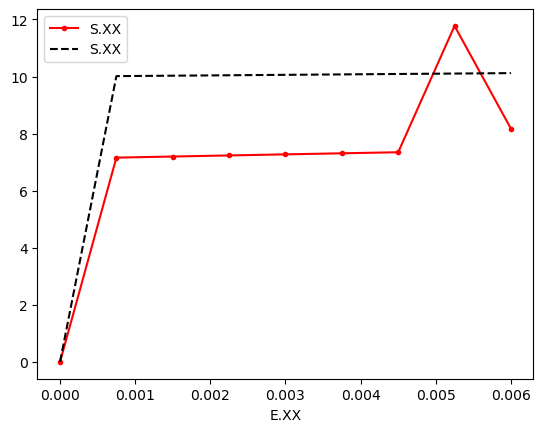

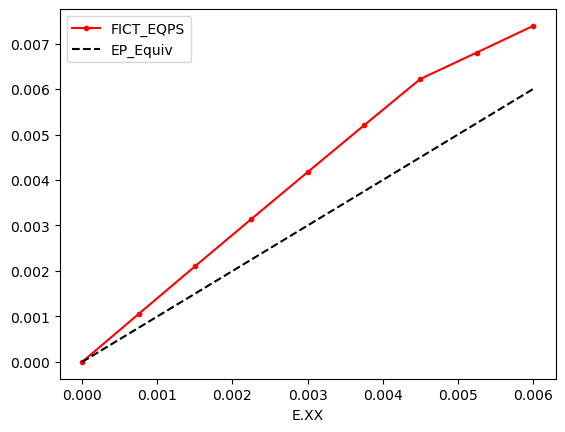

In [3]:
""" Using a rotation
def B(eqps):
    alpha = 90*np.pi/180
    B_in = np.array([ [1,0,0], [0, cos(alpha), -sin(alpha)], [ 0, sin(alpha), cos(alpha) ] ])
    #B_in = np.transpose(B_in) @ np.eye(3) @ B_in
    #print(B_in)
    return B_in
"""

"""
def B(X_0):
    X_0 = 0
    x = array([-0.324190879399528  , -0.5910265708699819 , -0.18063603062696332,
       -0.38121381734569654, -0.6175628700881645 , -0.23576228096254312,
       -0.28240916917730036, -0.5473481732181913 , -0.16744427128767322,
       -0.2630318047470945 , -0.4235775835834732 , -0.04148242995369289,
        0.5943025397254625 ,  0.5770764819925227 ,  0.05778373947936392,
       -0.4019021627391064 ,  0.6422532886726127 , -0.9725103257468183 ,
        0.564662540091747  , -0.32419465         , -0.59102337         ,
       -0.18063179         , -0.38121066         , -0.61755865         ,
       -0.23576606         , -0.28240491         , -0.54735189         ,
       -0.16744104         , -0.358838           , -0.42357774         ,
       -0.04148228         ,  0.5943027          ,  0.57707663         ,
        0.0577839          , -0.40190232         ,  0.64225345         ,
       -0.97251048         ,  0.56466269         ])
    eq = (array([[x[0], x[1], x[2]],
            [x[3], x[4], x[5]],
            [x[6], x[7], x[8]]])) * ((array(x[9]) + X_0 + array(x[9]) + X_0) * (X_0)) + array([[x[10], x[11], x[12] ],        
            [ x[13],  x[14] , x[15]],
            [ x[16], x[17],  x[18]]])
    return eq
"""

"""
def B(X):
    eq = np.eye(3)
    eq[0,0] += 1e-3
    eq[1,1] -= 1e-3
    return eq
"""

"""
def B(eqps):
    alpha = 10*np.pi/180
    B_in = np.array([ [1,0,0], [0, cos(alpha), -sin(alpha)], [ 0, sin(alpha), cos(alpha) ] ])

    B_in = align_axes_with_pi_plane_rot().T @ B_in @ align_axes_with_pi_plane_rot()
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot() @ B_in @ align_axes_with_pi_plane_rot().T
    #B_in = np.transpose(B_in) @ np.eye(3) @ B_in
    #print('B_in', B_in)
    return B_in
"""
individual_path = "D:/Work/software/st-bingo/research/experiments/checkpoints/hill_constant/checkpoint_151.pkl"
with open(individual_path, 'rb') as f:
    pkl = dill.load(f)
#""" Force deviatoric independence on a BINGO solution
def B(X_0):
    ISO_Y_0 = 10
    ISO_H = 20
    B_in = pkl.hall_of_fame[0].evaluate_equation_at(np.array([[X_0]]))[0]
    B_in *= (ISO_Y_0 + ISO_H*X_0)
    B_in = align_axes_with_pi_plane_rot().T @ B_in @ align_axes_with_pi_plane_rot()
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot() @ B_in @ align_axes_with_pi_plane_rot().T
    return B_in
#"""

# Shared params
E = 10e6
nu = .333
Y0 = 10
H = 20

all_comps = (0.006, 0, 0)
all_loads = 'ESS'
all_frames = 8

# Run ST_GPSR_TTM model
pGPSR = {'E': E, 'Nu': nu, 'Y0': Y0, 'H': H, "B": B}
mpsGPSR = run_ST_GPSR_TTM(pGPSR, frames=all_frames, components=all_comps, loads=all_loads)
# Run the included von mises model
pVM = {'E': E, 'Nu': nu, 'Y0': Y0, 'Y1': H, 'm': 1.0}
mpsVM = MaterialPointSimulator('VM_Plastic')
mpsVM.material = HardeningPlasticMaterial(**pVM)
mpsVM = run_generic_mps(mpsVM, pVM, frames=all_frames, components=all_comps, loads=all_loads)

ax = mpsGPSR.plot('E.XX', 'S.XX', style='.r-')
mpsVM.plot('E.XX', 'S.XX', ax=ax, style='k--')

ax2 = mpsGPSR.plot('E.XX', 'FICT_EQPS', style='.r-')
mpsVM.plot('E.XX', 'EP_Equiv', ax=ax2, style='k--')

# print(mpsGPSR.df[['FICT_EQPS', 'Y']])
# print(mpsVM.df[['EP_Equiv', 'S.XX']])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     df = mpsGPSR.df[['E.XX', 'MML_STRESS_GUESS',  'TRIAL_STRESS_PRE_TRANS', 'FICT_EQPS_INPUT', 'TRIAL_STRESS_POST_TRANS', 'CONV_STRESS_ISO', 'CONV_STRESS_REAL', 'FICT_EQPS', 'S.XX', 'DELTA_EXX', 'DELTA_EYY', 'DELTA_EZZ']]
#     df.to_csv('output1.csv')
#     print(df)
df_full = pd.DataFrame(mpsGPSR.material.full_sdv_storage, columns=full_sdv_column_names)
df_full = df_full[column_reorder]
df_full.to_csv('full_shabang_0.csv')


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_vm_reference = mpsGPSR.df[['E.XX', 
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    'S.XX',
                    'S.YY',
                    'S.ZZ',
                    'S.YZ',
                    'S.XZ',
                    'S.XY',
                    'S.VM']]
    df_vm_reference.to_csv('output0.csv')


# Display subsections of the Full Shebang

In [16]:
time_zero = df_full[df_full['TIME'] == 0.75]
dtime = time_zero #[time_zero['DTIME'] == 0.05]
display(dtime[['DELTA_EXX', 'DELTA_EYY', 'DELTA_EZZ']])

,DELTA_EXX,DELTA_EYY,DELTA_EZZ
816,0.00075,0.000000e+00,0.000000e+00
817,0.00075,0.000000e+00,0.000000e+00
818,0.00075,7.450581e-09,0.000000e+00
819,0.00075,-7.450581e-09,0.000000e+00
820,0.00075,0.000000e+00,7.450581e-09
...,...,...,...
922,0.00075,1.734618e-04,-9.198060e-04
923,0.00075,1.529374e-04,-9.043744e-04
924,0.00075,1.765289e-04,-9.310334e-04
925,0.00075,1.551195e-04,-9.048999e-04


# Investigate CPA inner workings

In [5]:
# Pull out the CPA history for a certain row of interest. This block extracts the trial_Sigma history
ROW_OF_INTEREST = 12
# np.hstack([trial_Sigma_f, [yield_F], dGdSigma, dGdSigma @ C @ dGdSigma, [dGamma], delta_e_p, e_p_iso, [trial_iso_eqps] ])
r6 = range(6)
CPA_HISTORY_COLUMNS = [ [f'trial_Sigma_f_{i}' for i in r6 ], ['yield_F'], [ 'dGdSigma_{i}' for i in r6], ['v_C_v'], ['dGamma'],
                       [ 'delta_e_p_{i}' for i in r6], [ 'e_p_iso_{i}' for i in r6 ], ['trial_iso_eqps'] ]
CPA_HISTORY_COLUMNS = [x for xs in CPA_HISTORY_COLUMNS for x in xs]
cpa_history = mpsGPSR.material.cutting_plane_history[ROW_OF_INTEREST]
cpa_history = pd.DataFrame(cpa_history, columns=CPA_HISTORY_COLUMNS)

trial_stress_trajectory = np.array(cpa_history[[f'trial_Sigma_f_{i}' for i in range(3) ]])
trial_stress_trajectory

array([[ 8927.43489782,  2373.95581101, 11153.69911153],
       [ 7486.85767581,  7478.55347   ,  7489.67867455]])

In [6]:
# Get the data outside of the CPA algorithm
w = df_full.iloc[12]
#print(w)
# What is the start and end point of real stresses?
delta_real_stress = [ w[['TRIAL_STRESS_PRE_TRANS_XX', 'TRIAL_STRESS_PRE_TRANS_YY', 'TRIAL_STRESS_PRE_TRANS_ZZ']],
                 w[['REAL_SXX', 'REAL_SYY', 'REAL_SZZ']] ]
delta_real_stress = np.array(delta_real_stress)
delta_real_stress

array([[11235.96767455,  5609.5610729 ,  5609.5610729 ],
       [ 7489.79336182,  7482.64823787,  7482.64822067]])

In [7]:
# Now, if I inputted that stress into an unrotated CPA algorithm, what would happen?
B_new = lambda X_0: np.eye(3)
vir_GPSR = {'E': E, 'Nu': nu, 'Y0': Y0, 'H': H, "B": B_new}
mps_vir_GPSR = run_ST_GPSR_TTM(vir_GPSR, frames=1, loads='ESS', components=w[['DELTA_EXX', 'DELTA_EYY', 'DELTA_EYY']])
#mps_vir_GPSR.plot('E.XX', 'S.XX')
vir_df = pd.DataFrame(mps_vir_GPSR.material.full_sdv_storage, columns=full_sdv_column_names)
vir_df = vir_df[column_reorder]
vir_df.to_csv('vir_shabang_0.csv')

VIR_ROI = 12
vir_cpa_history = mps_vir_GPSR.material.cutting_plane_history[VIR_ROI]
vir_cpa_history = pd.DataFrame(vir_cpa_history, columns=CPA_HISTORY_COLUMNS)

vir_stress_trajectory = np.array(vir_cpa_history[[f'trial_Sigma_f_{i}' for i in range(3) ]])
vir_stress_trajectory

array([[11235.96767455,  5609.5610729 ,  5609.5610729 ],
       [ 7491.70475722,  7481.69253157,  7481.69253157]])

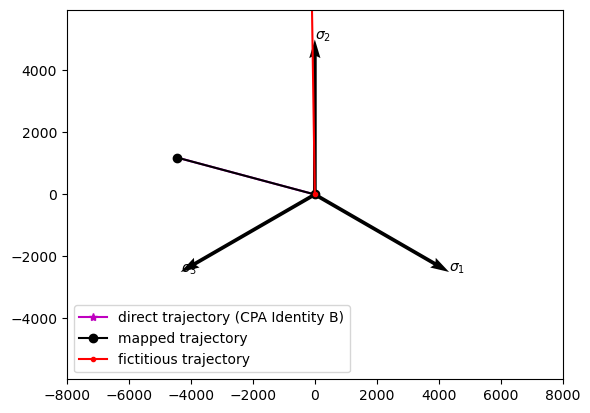

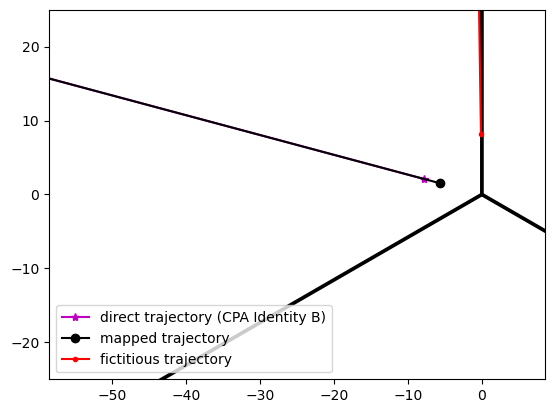

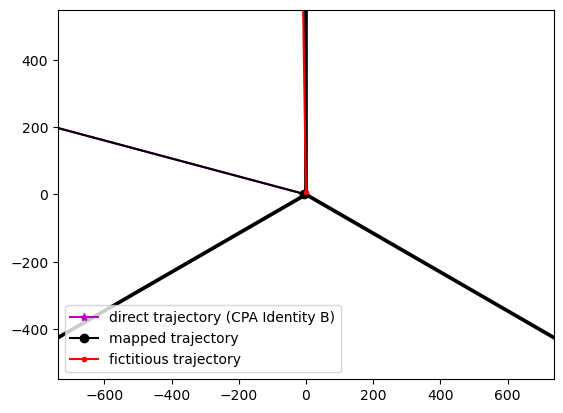

In [8]:
pi_plane_trial_stress_trajectory = (align_pi_plane_with_axes_rot() @ trial_stress_trajectory.T).T[:,:2]
pi_plane_delta_real_trajectory = (align_pi_plane_with_axes_rot() @ delta_real_stress.T).T[:,:2]
pi_plane_vir_stress_trajectory = (align_pi_plane_with_axes_rot() @ vir_stress_trajectory.T).T[:,:2]


fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-8000, 8000])
ax.set_ylim([-8000, 8000])

plt.show()

fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-50, 0])
ax.set_ylim([-25, 25])

plt.show()


fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-550, 550])
ax.set_ylim([-550, 550])

plt.show()

In [9]:
# You're telling me rotating the stress puts it out in the middle of no where?
# Next two cells: just verify that, and the VM value
B_inv = np.linalg.inv(B(0))
B_inv

real_stress = B_inv @ trial_stress_trajectory[1,:]
real_stress

array([7489.78292072, 7482.65344982, 7482.65344982])

In [10]:
def equivalent_stress( mandel_stress_vec):
    ROOT2 = np.sqrt(2)
    # MML stress comes in the following order: 11, 22, 33, 12, 23, 13
    sigma_11, sigma_22, sigma_33, sigma_12, sigma_23, sigma_13 = mandel_stress_vec
    sigma_12 = sigma_12/ROOT2
    sigma_23 = sigma_23/ROOT2
    sigma_13 = sigma_13/ROOT2
    internal = (sigma_11 - sigma_22)**2 + (sigma_22 - sigma_33)**2 + (sigma_33 - sigma_11)**2 + 3*(sigma_23**2 + sigma_13**2 + sigma_12**2)
    vm = np.sqrt(0.5*internal)
    return vm
equivalent_stress(np.hstack([real_stress, 0,0,0]))

7.129470895344184

In [11]:
# Okay ,apparently it's broken. Let's convert the real answer to fictious stress space / COnclision: nope, it doesnt match up
right_stress = vir_stress_trajectory[1,:]
B(0) @ right_stress, equivalent_stress(np.hstack([B(0) @ right_stress, 0,0,0]))

(array([7487.59670874, 7475.93475182, 7491.5583598 ]), 14.067569885243758)

In [12]:
# BINGO found this equation for hydrostat = 0
# how about we remove the hydrostat, and do the calculation
right_stress = vir_stress_trajectory[1,:]
dev_right_stress = right_stress - 1/3.*np.sum(right_stress)
# Conclusio: it's the right iso yield surface!
B(0) @ dev_right_stress, equivalent_stress(np.hstack([B(0) @ dev_right_stress, 0,0,0]))


(array([ 2.56676862, -9.0951883 ,  6.52841968]), 14.067569885244534)

In [13]:
# Okay, let's try that with real_Stress
trial_stress_dev = trial_stress_trajectory[1,:] - 1./3.*np.sum(trial_stress_trajectory[1,:])
dev_real_stress = B_inv @ trial_stress_dev
dev_real_stress

array([ 4.7529806, -2.3764903, -2.3764903])

In [14]:
equivalent_stress(np.hstack([dev_real_stress, 0,0,0]))

7.129470895344634

In [15]:
dev_plus_iso_real_stress = dev_real_stress + 1./3.*np.sum(trial_stress_trajectory[1,:])
dev_plus_iso_real_stress

array([7489.78292072, 7482.65344982, 7482.65344982])